## Flight Delay Prediction


In [2]:
import pandas as pd

In [3]:
Flight = pd.read_csv(r"G:\My Drive\CIS 663 R programming\ATC_R_Project\DATA\air_traffic_main_Data.csv")

In [47]:
Flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           3351 non-null   int64  
 1   Month                          3351 non-null   int64  
 2   Carrier                        3351 non-null   object 
 3   Carrier_Name                   3351 non-null   object 
 4   Airport                        3351 non-null   object 
 5   Airport_Name                   3351 non-null   object 
 6   Arrival_Flights                3343 non-null   float64
 7   Arrival_Delay_Flights          3343 non-null   float64
 8   Carrier_Delayed_Flights        3343 non-null   float64
 9   Weather_Delayed_Flights        3343 non-null   float64
 10  NAS_Delayed_Flights            3343 non-null   float64
 11  Security_Delayed_Flights       3343 non-null   float64
 12  Late_Aircraft_Delayed_Flights  3343 non-null   f

In [5]:
Flight.shape

(3351, 21)

In [6]:
Flight.rename(columns={
    'year': "Year",
    'month': "Month",
    'carrier': "Carrier",
    'carrier_name': "Carrier_Name",
    'airport': "Airport",
    'airport_name': "Airport_Name",
    'arr_flights': "Arrival_Flights",
    'arr_del15': "Arrival_Delay_Flights",
    'carrier_ct': "Carrier_Delayed_Flights",
    'weather_ct': "Weather_Delayed_Flights",
    'nas_ct': "NAS_Delayed_Flights",
    'security_ct': "Security_Delayed_Flights",
    'late_aircraft_ct': "Late_Aircraft_Delayed_Flights",
    'arr_cancelled': "Arrivals_Cancelled",
    'arr_diverted': "Arrivals_Diverted",
    'arr_delay': "Total_Arrival_Delay",
    'carrier_delay': "Carrier_Delay_Time",
    'weather_delay': "Weather_Delay_Time",
    'nas_delay': "NAS_Delay_Time",
    'security_delay': "Security_Delay_Time",
    'late_aircraft_delay': "Late_Aircraft_Delay_Time"
}, inplace=True)


In [8]:
Flight.columns

Index(['Year', 'Month', 'Carrier', 'Carrier_Name', 'Airport', 'Airport_Name',
       'Arrival_Flights', 'Arrival_Delay_Flights', 'Carrier_Delayed_Flights',
       'Weather_Delayed_Flights', 'NAS_Delayed_Flights',
       'Security_Delayed_Flights', 'Late_Aircraft_Delayed_Flights',
       'Arrivals_Cancelled', 'Arrivals_Diverted', 'Total_Arrival_Delay',
       'Carrier_Delay_Time', 'Weather_Delay_Time', 'NAS_Delay_Time',
       'Security_Delay_Time', 'Late_Aircraft_Delay_Time'],
      dtype='object')

In [10]:
Flight_long = pd.melt(Flight, id_vars=['Year','Month','Carrier','Carrier_Name','Airport',
                                       'Airport_Name','Total_Arrival_Delay'],
                     value_vars=['Carrier_Delay_Time', 'Weather_Delay_Time', 'NAS_Delay_Time',
       'Security_Delay_Time', 'Late_Aircraft_Delay_Time'],
                     var_name="Type_of_Delay",
                     value_name="Delay_Minutes")

In [50]:
Flight_long.shape

(16755, 9)

In [13]:
Flight_Capped = Flight_long[Flight_long["Total_Arrival_Delay"] <= 720]

In [49]:
Flight_Capped.shape

(8215, 9)

In [15]:
import seaborn as sns

In [16]:
import matplotlib.pyplot as plt

In [35]:
sns.set (style="white")

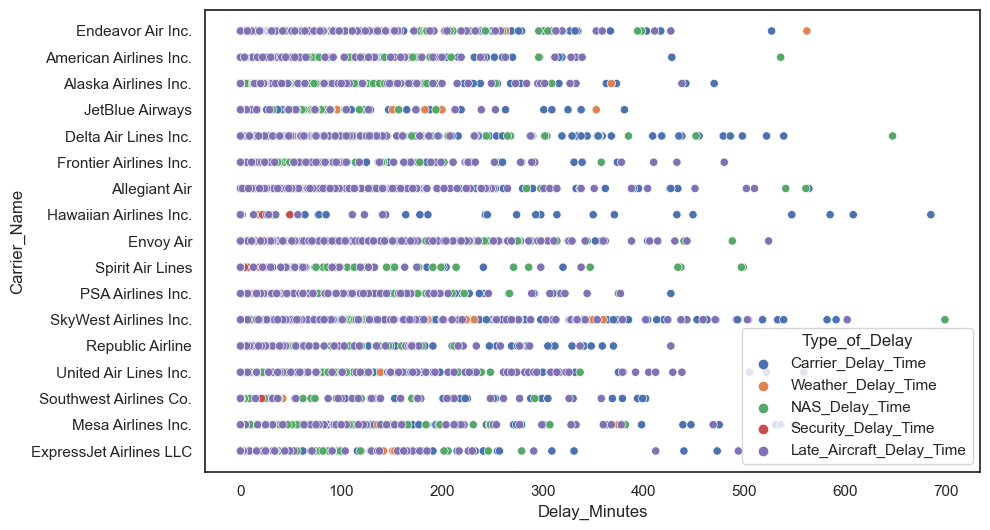

In [36]:
plt.figure(figsize=(10,6))

sns.scatterplot(data="Flight_Capped", x= Flight_Capped["Delay_Minutes"],  y = Flight_Capped["Carrier_Name"],
                               hue= Flight_Capped["Type_of_Delay"])

plt.title = ('Delay minutes by Carrier and Type of Delay')
plt.xlabel = ('Carrier_Name')
plt.ylabel = ('Delay_Minutes')

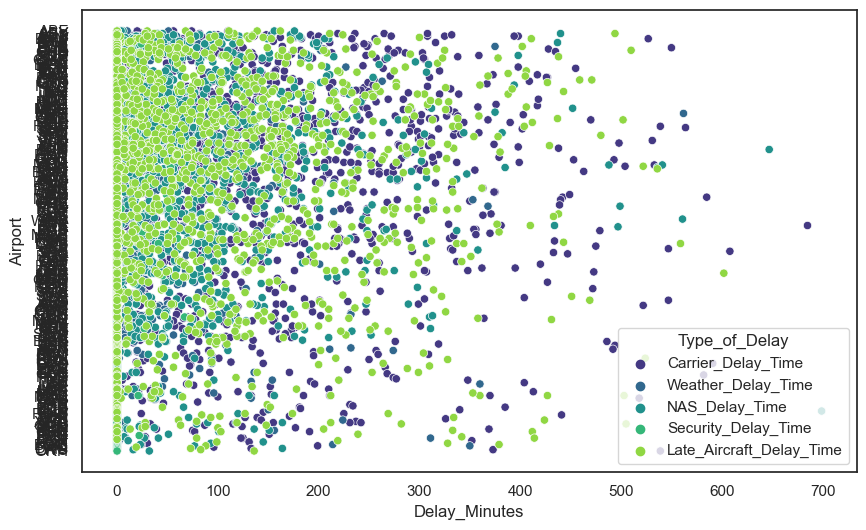

In [51]:
sns.set(style='white')
plt.figure(figsize=(10,6))

sns.scatterplot(data="Flight_Capped", x= Flight_Capped["Delay_Minutes"],  y = Flight_Capped["Airport"],
                               hue= Flight_Capped["Type_of_Delay"], palette = 'viridis')

plt.title = ('Delay minutes by Carrier and Type of Delay')
plt.xlabel = ('Carrier_Name')
plt.ylabel = ('Delay_Minutes')

In [48]:
Flight_Capped.isnull().sum()

Year                   0
Month                  0
Carrier                0
Carrier_Name           0
Airport                0
Airport_Name           0
Total_Arrival_Delay    0
Type_of_Delay          0
Delay_Minutes          0
dtype: int64

## Creating Regression Model